<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam , RMSprop
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### ONLY FFOR APPLYING IN HUGGINGFACES
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # force TensorFlow to CPU

import tensorflow as tf
from tensorflow.keras.models import load_model

## Loading the dataset

In [ ]:
df=pd.read_csv('/content/bank-service.csv')

## Data Overview

In [ ]:
df.head()
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
df.describe(include='object')

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for i in df.columns:
  print(i,df[i].unique())

RowNumber [    1     2     3 ...  9998  9999 10000]
CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 7

In [ ]:
for i in df.columns:
  print(i,df[i].value_counts(normalize=True),'\n\n',"-"*40)

RowNumber RowNumber
9984    0.0001
9983    0.0001
9982    0.0001
9981    0.0001
9980    0.0001
         ...  
5       0.0001
4       0.0001
3       0.0001
2       0.0001
1       0.0001
Name: proportion, Length: 10000, dtype: float64 

 ----------------------------------------
CustomerId CustomerId
15656710    0.0001
15768163    0.0001
15672754    0.0001
15719276    0.0001
15692664    0.0001
             ...  
15737888    0.0001
15701354    0.0001
15619304    0.0001
15647311    0.0001
15634602    0.0001
Name: proportion, Length: 10000, dtype: float64 

 ----------------------------------------
Surname Surname
Smith        0.0032
Scott        0.0029
Martin       0.0029
Walker       0.0028
Brown        0.0026
              ...  
Hull         0.0001
Sturdee      0.0001
Flannagan    0.0001
Dwyer        0.0001
Corby        0.0001
Name: proportion, Length: 2932, dtype: float64 

 ----------------------------------------
CreditScore CreditScore
850    0.0233
678    0.0063
655    0.0054
705    

###Credit score and Age Have a lot of variables ,converting them to bins may help to understand the data and predict better

In [ ]:
num_bins=5
df['CreditScore_bins']=pd.cut(df['CreditScore'],bins=num_bins,labels=[1,2,3,4,5],include_lowest=True)
df['Age_bins']=pd.cut(df['Age'],bins=num_bins,labels=[1,2,3,4,5],include_lowest=True)
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited CreditScore_bins Age_bins  
0        101348.88       1                3        2  
1        112542.58       0                3        2  
2        113931.57       1                2        2  
3         93826.63       0                4        2  
4         79084.10       0                5        2

###get the ranges of the bins

In [ ]:
credit_bins = pd.cut(df['CreditScore'], bins=num_bins, include_lowest=True)
age_bins = pd.cut(df['Age'], bins=num_bins, include_lowest=True)

# Print bin edges for CreditScore
print("CreditScore Bins Edges:")
credit_bin_edges = credit_bins.cat.categories  # Accessing the categories for CreditScores

# Extract the bin edges from the bins attribute directly
edges_credit = credit_bins.cat.categories
for i in range(len(edges_credit)):
    lower = edges_credit[i].left
    upper = edges_credit[i].right
    print(f"Bin {i + 1}: {lower} to {upper}")

# Print bin edges for Age
print("\nAge Bins Edges:")
age_bin_edges = age_bins.cat.categories  # Accessing the categories for Age

# Extract the bin edges from the bins attribute directly
edges_age = age_bins.cat.categories
for i in range(len(edges_age)):
    lower = edges_age[i].left
    upper = edges_age[i].right
    print(f"Bin {i + 1}: {lower} to {upper}")

CreditScore Bins Edges:
Bin 1: 349.499 to 450.0
Bin 2: 450.0 to 550.0
Bin 3: 550.0 to 650.0
Bin 4: 650.0 to 750.0
Bin 5: 750.0 to 850.0

Age Bins Edges:
Bin 1: 17.924999999999997 to 32.8
Bin 2: 32.8 to 47.6
Bin 3: 47.6 to 62.4
Bin 4: 62.4 to 77.2
Bin 5: 77.2 to 92.0


In [ ]:
df['CreditScore_bins'].value_counts()

CreditScore_bins
4    3465
3    3316
5    1598
2    1432
1     189
Name: count, dtype: int64

In [ ]:
df.groupby('CreditScore_bins')['Exited'].value_counts()

CreditScore_bins  Exited
1                 0          128
                  1           61
2                 0         1125
                  1          307
3                 0         2627
                  1          689
4                 0         2798
                  1          667
5                 0         1285
                  1          313
Name: count, dtype: int64

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'CreditScore_bins',
       'Age_bins'],
      dtype='object')

###Drop RowNumbers ,customerID and surename as they dont impact our analysis and predictions

In [ ]:
df.drop((['RowNumber', 'CustomerId', 'Surname']),axis=1,inplace=True)

In [ ]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited CreditScore_bins  \
0          1               1        101348.88       1                3   
1          0               1        112542.58       0                3   
2          1               0        113931.57       1                2   
3          0               0         93826.63       0                4   
4          1               1         79084.10       0                5   

  Age_bins  
0        2  
1        2  
2        2  
3        2  
4        2

## Exploratory Data Analysis

### Univariate Analysis

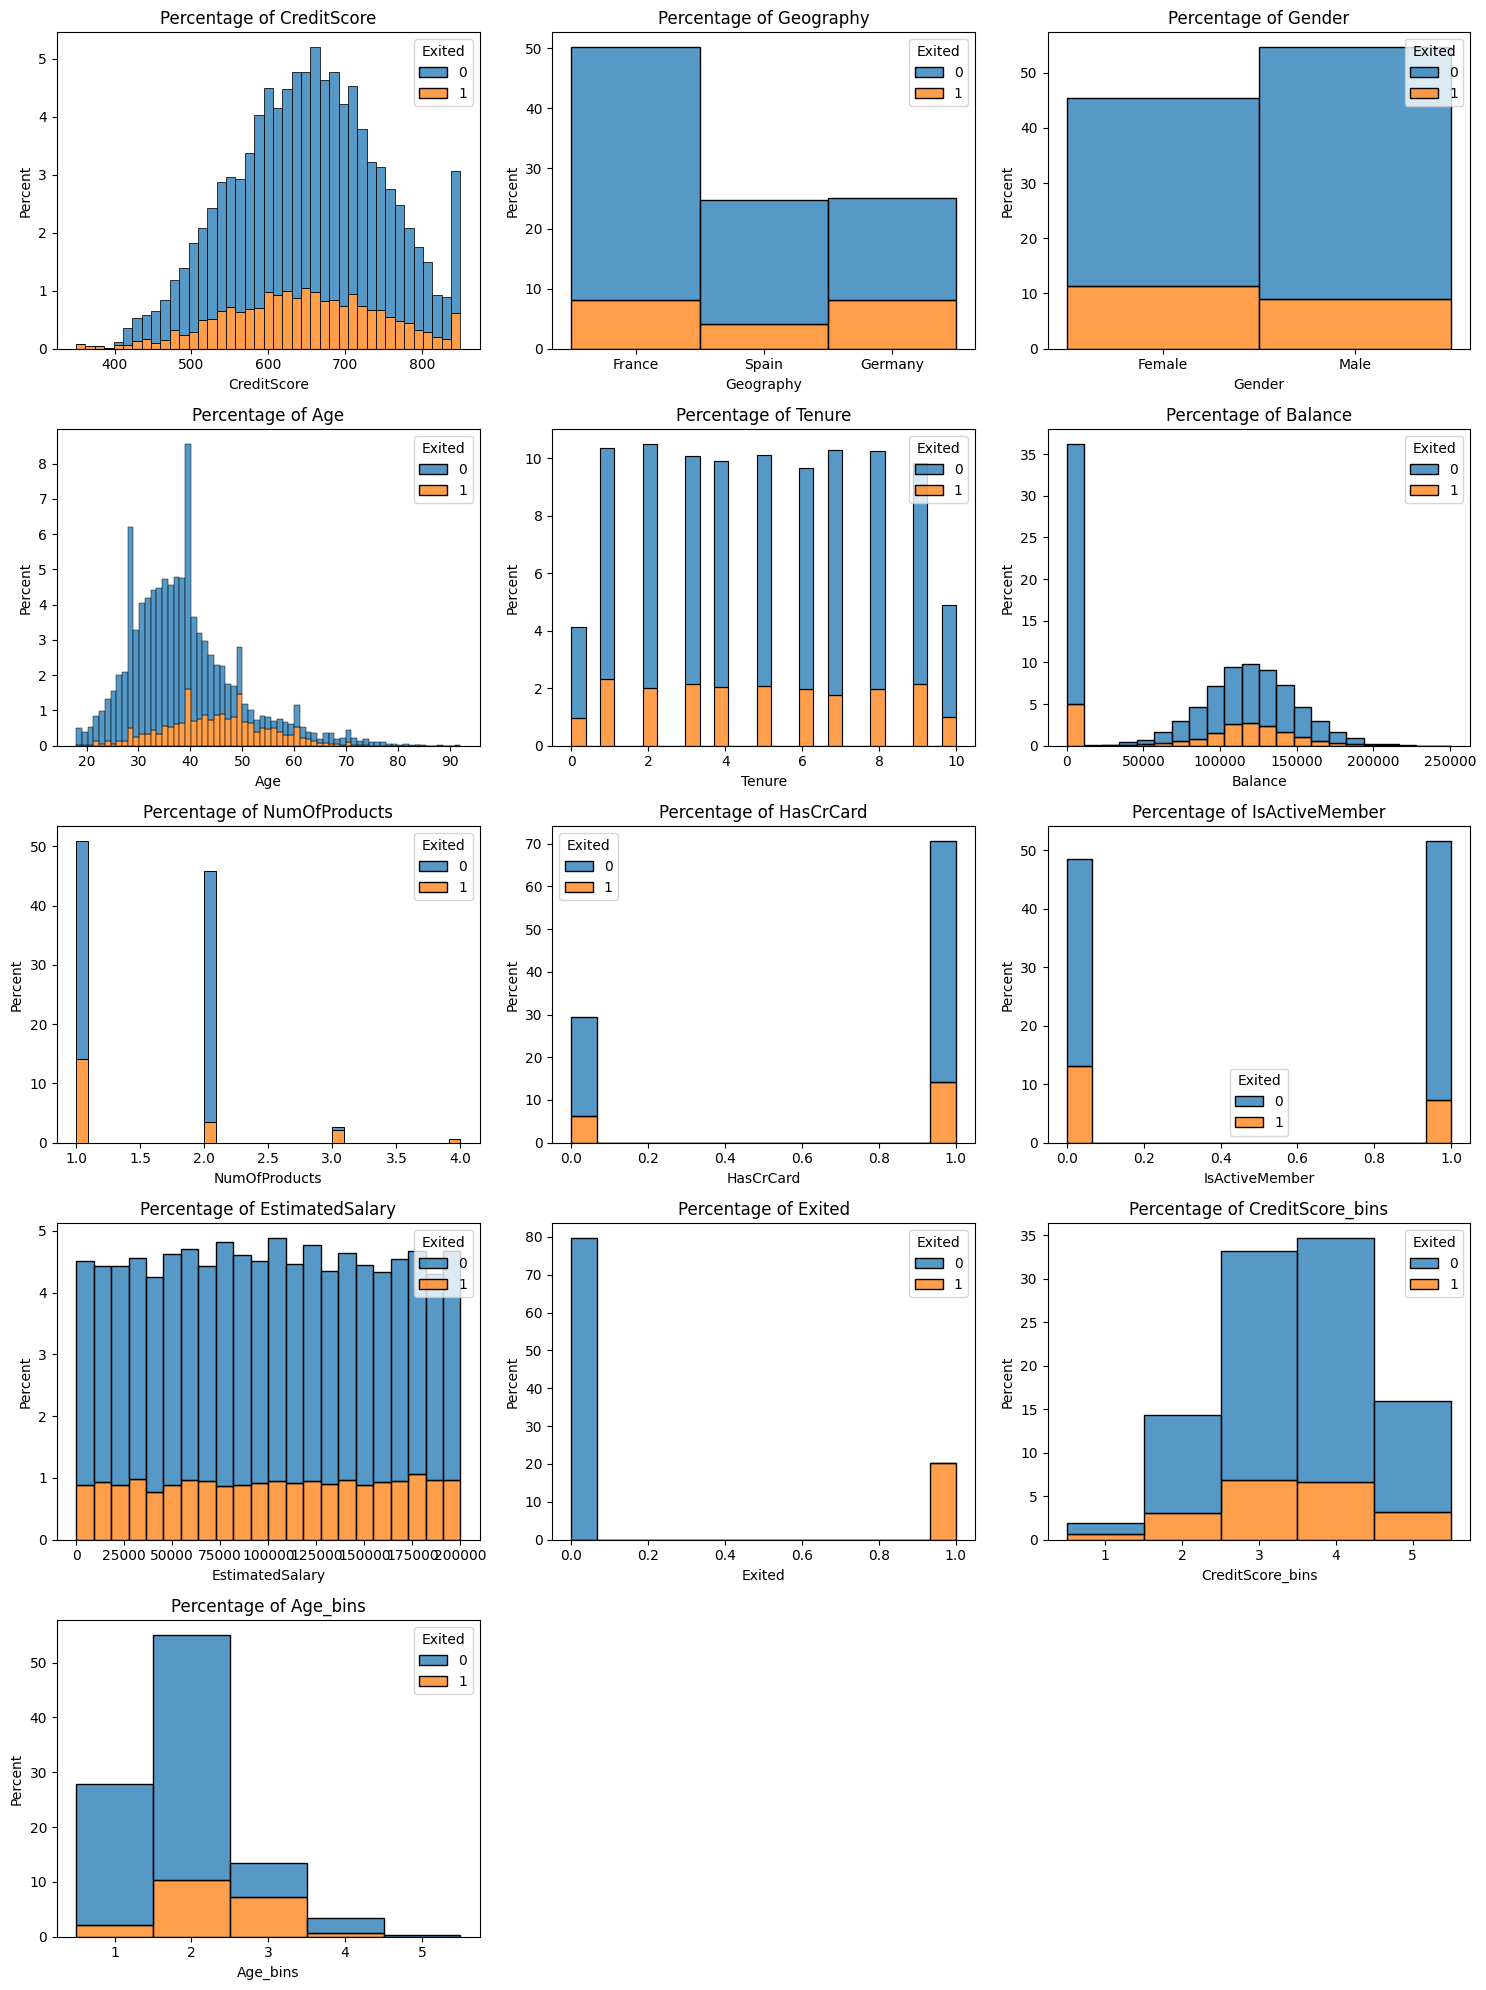

In [ ]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3,i+1)  # 5 rows, 3 columns
    sns.histplot(data=df, x=feature, hue='Exited', multiple='stack', stat='percent')
    plt.title(f'Percentage of {feature}')


plt.tight_layout()
plt.show()

* Percentage of CreditScore:
customers are normally distributed  alonge the score with increase customers with scores above 800

* Percentage of Geography:
France has the highest number of customers while spain and germany nearly equal,percentage of existing customers in germany are greater than others

* Percentage of Gender:
male customers are more than female and existing in females is more may be due to unstable financial status and job opportunities

* Percentage of Age:
Age is skewed to the right  as most customers are in  younger ages while the existing is mostly in the medium age above 40

* Percentage of Balance:more the 35% of customers has balance less than 50000 and 5% of them are existing

* Percentage of NumOfProducts:
95% of customers have maximum 2 products which doesnt reflect clear loyality to the bank

* 70% of customers have credit cards which impact the bank loyality

* Percentage of IsActiveMember: 50% of customers are active indicating less engagment and use for bank services

* Percentage of Exited:
20% customers are exiting showing signal dissatisfaction or competitive pressures in the market.




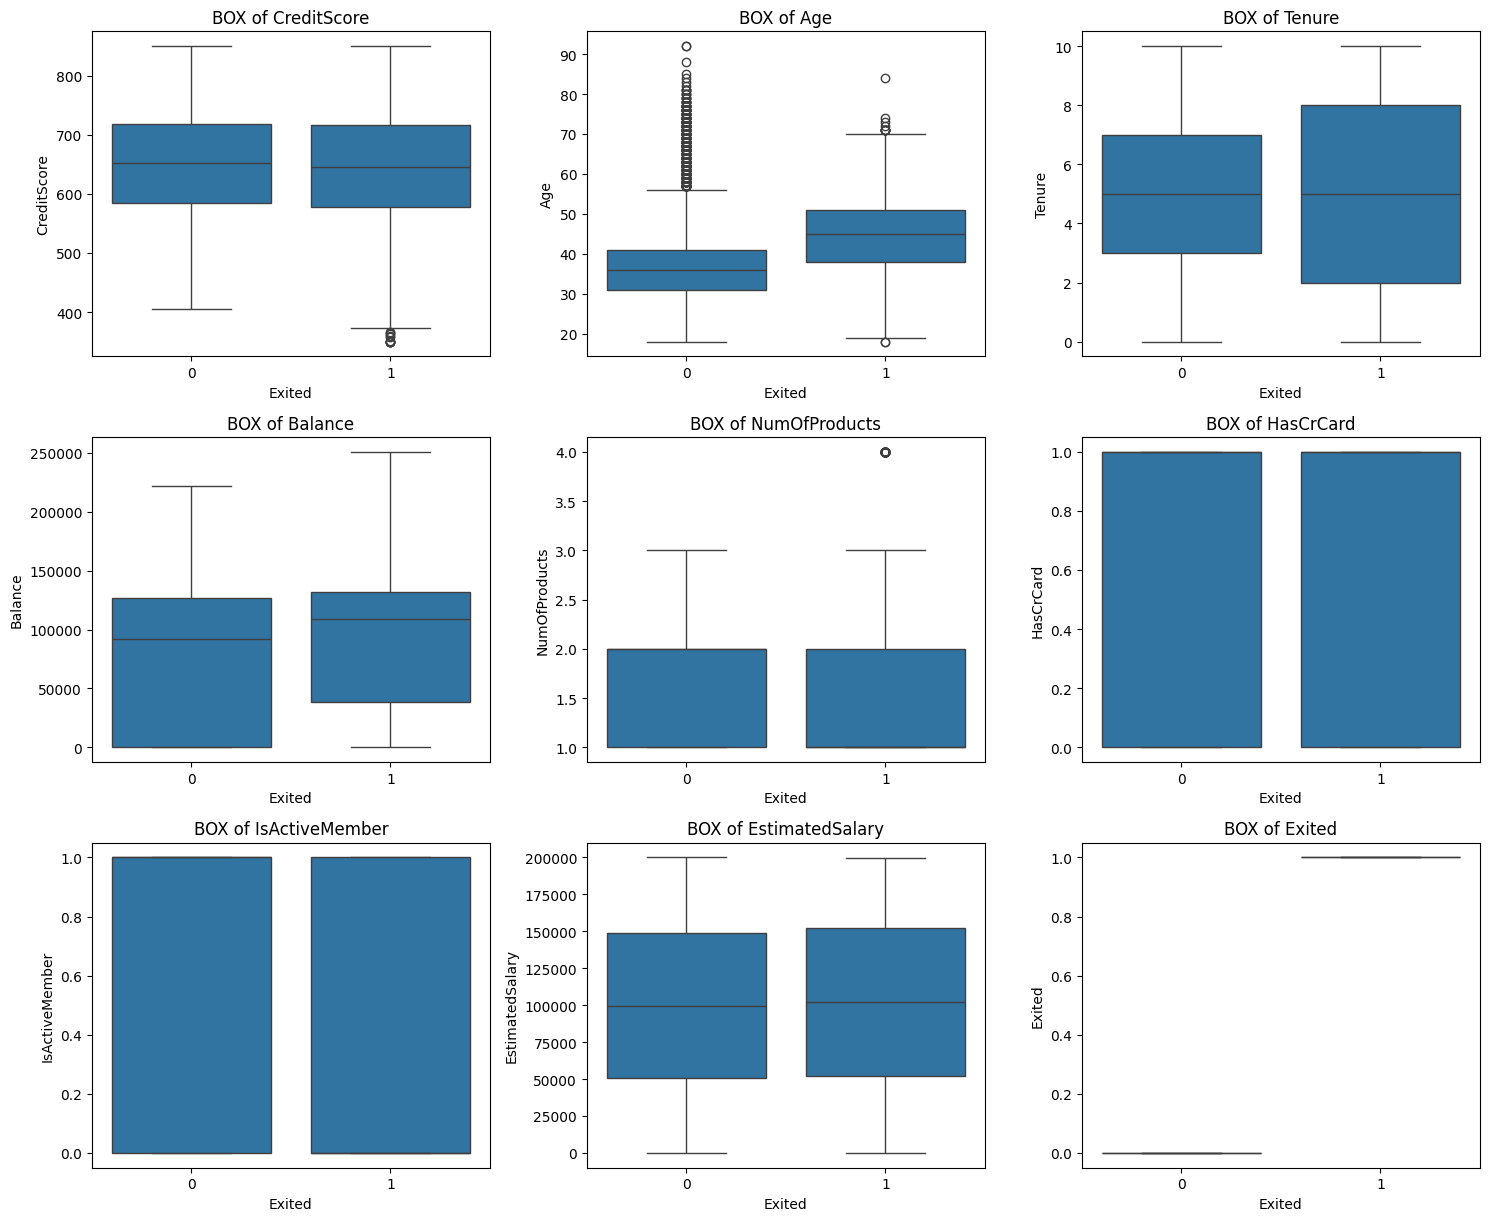

In [ ]:
df_num=df.select_dtypes(include='number')

# Create a subplot grid with
plt.figure(figsize=(15, 20))
for i, feature in enumerate(df_num.columns):
    plt.subplot(5, 3,i+1)  # 5 rows, 3 columns
    #histogram_boxplot(data=df, feature=feature, kde=True)
    sns.boxplot(data=df, y=feature, x='Exited')
    plt.title(f'BOX of {feature}')


plt.tight_layout()
plt.show()

* Most of exiting are above age of 40
* customers with balance above 50000 are exiting more

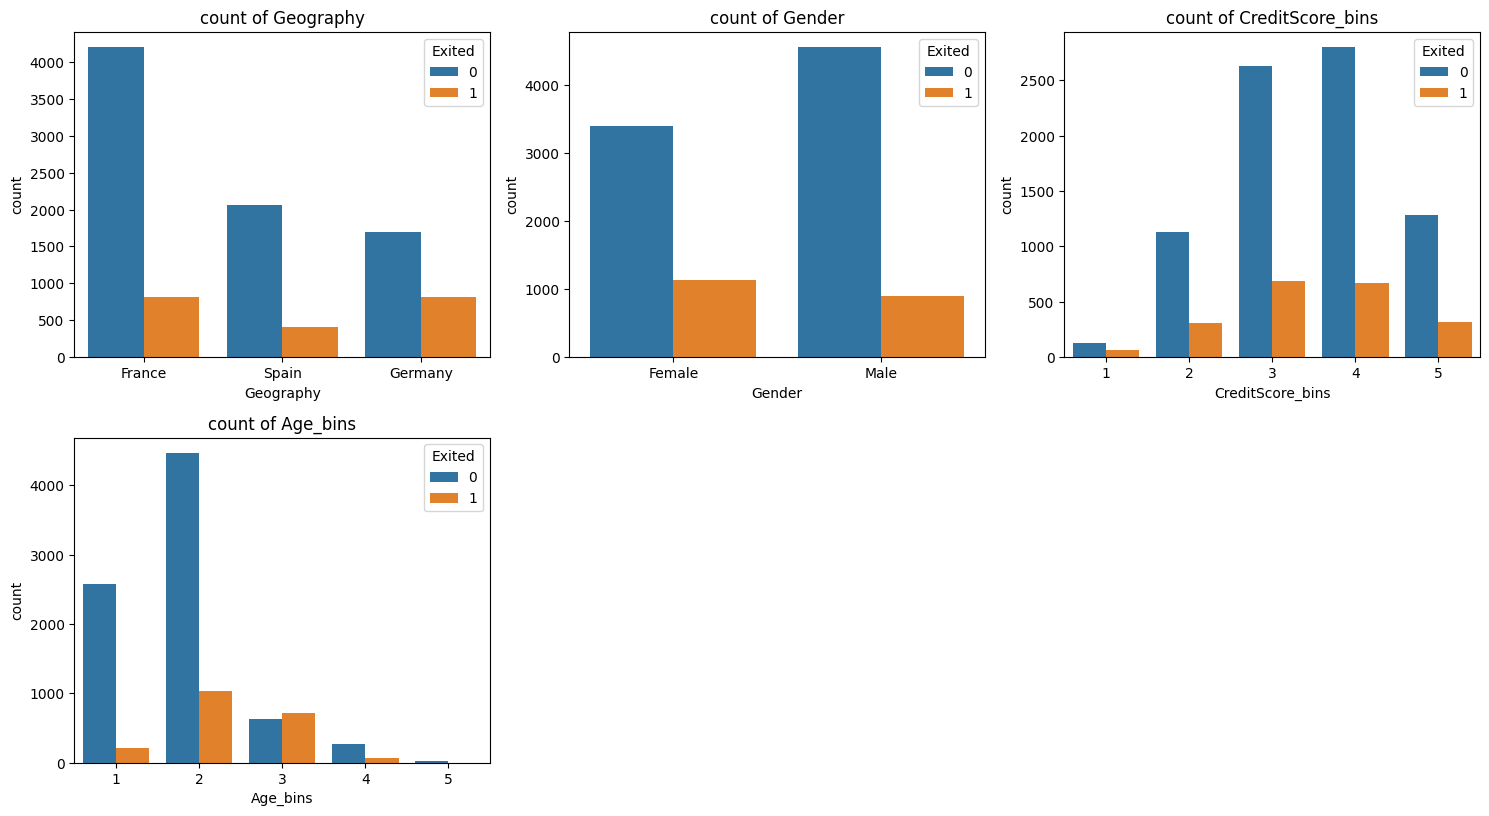

In [ ]:
df_cat=df.select_dtypes(include=['object','category'])
# Create a subplot grid with
plt.figure(figsize=(15, 20))
for i, feature in enumerate(df_cat.columns):
    plt.subplot(5, 3,i+1)  # 5 rows, 3 columns
    sns.countplot(data=df, x=feature, hue='Exited')
    plt.title(f'count of {feature}')


plt.tight_layout()
plt.show()

In [ ]:
df_num = df.select_dtypes(include='number')
num_features = len(df_num.columns)

# Create a subplot grid with 3 columns
for i, feature in enumerate(df_num.columns):
    fig = make_subplots(rows=1, cols=3, subplot_titles=(
        f'Histogram of {feature}',
        f'Boxplot of {feature}',
        f'Percentage of {feature}'
    ))

    # Add histogram to the first subplot
    hist = px.histogram(df, x=feature)
    for trace in hist.data:
        fig.add_trace(trace, row=1, col=1)

    # Add boxplot to the second subplot
    box = px.box(df, x=feature)
    for trace in box.data:
        fig.add_trace(trace, row=1, col=2)

    # Add percentage histogram to the third subplot
    percent_hist = px.histogram(df, x=feature, histnorm='percent')
    for trace in percent_hist.data:
        fig.add_trace(trace, row=1, col=3)


    fig.update_layout(height=400,width=1100)
    # Show the combined figure
    fig.show()

* 35% of customers are with Balance 2500
* 2.5% of the customers have 850 score
* Age is right skewed with alot of outliers values

### Bivariate Analysis

<Axes: >

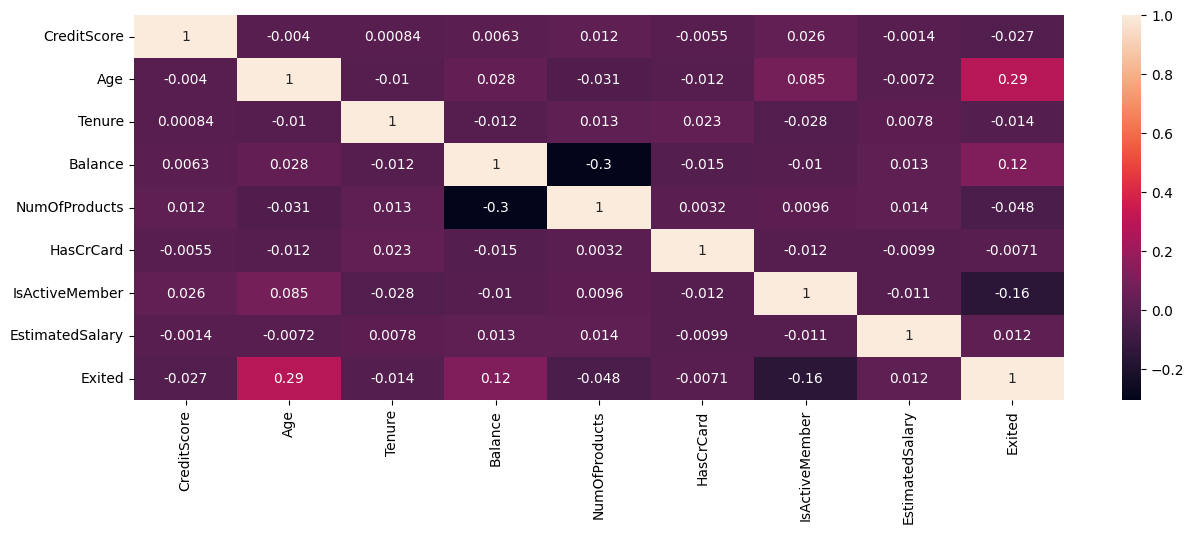

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_num.corr(),annot=True)

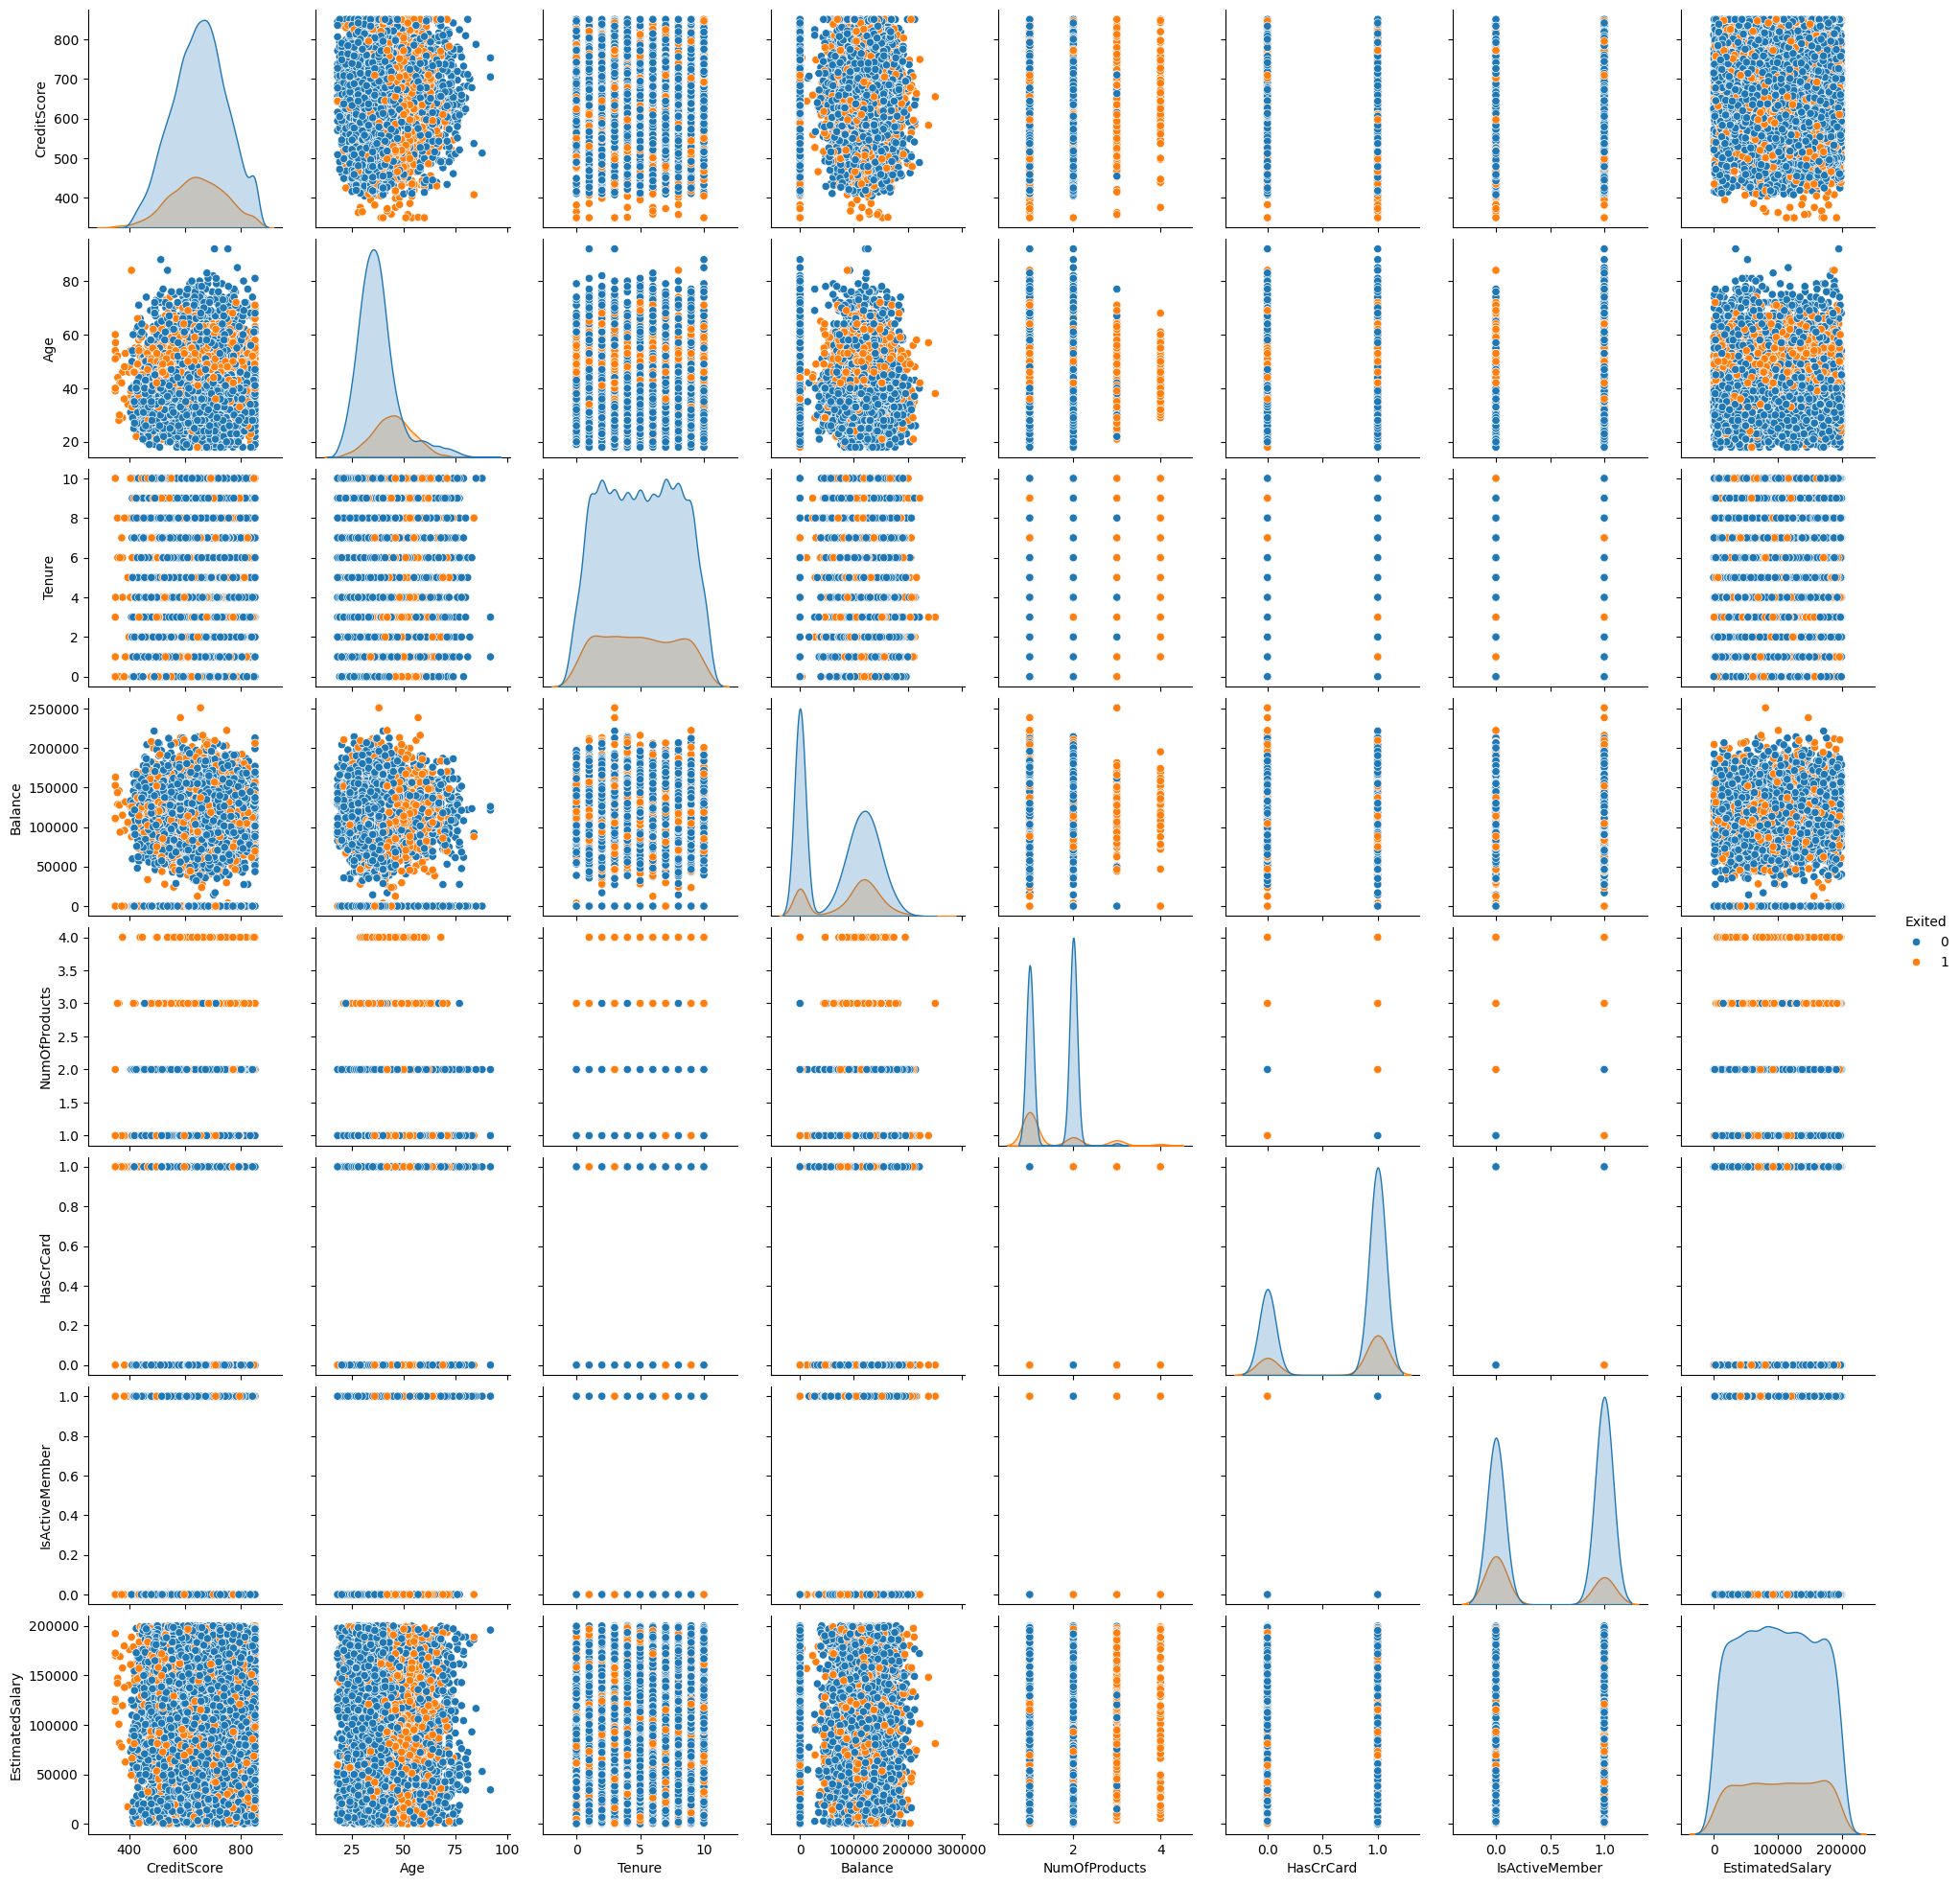

In [ ]:
sns.pairplot(df,hue='Exited')

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
df.info()
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
data_cat = ['Geography', 'Gender', 'CreditScore_bins', 'Age_bins', 'CreditScore']
for col in data_cat:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CreditScore       10000 non-null  int64   
 1   Geography         10000 non-null  object  
 2   Gender            10000 non-null  object  
 3   Age               10000 non-null  int64   
 4   Tenure            10000 non-null  int64   
 5   Balance           10000 non-null  float64 
 6   NumOfProducts     10000 non-null  int64   
 7   HasCrCard         10000 non-null  int64   
 8   IsActiveMember    10000 non-null  int64   
 9   EstimatedSalary   10000 non-null  float64 
 10  Exited            10000 non-null  int64   
 11  CreditScore_bins  10000 non-null  category
 12  Age_bins          10000 non-null  category
dtypes: category(2), float64(2), int64(7), object(2)
memory usage: 879.4+ KB


In [ ]:
df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          228          0       0   42       2       0.00              1   
1          217          2       0   41       1   83807.86              1   
2          111          0       0   42       8  159660.80              3   
3          308          0       0   39       1       0.00              2   
4          459          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  CreditScore_bins  \
0          1               1        101348.88       1                 2   
1          0               1        112542.58       0                 2   
2          1               0        113931.57       1                 1   
3          0               0         93826.63       0                 3   
4          1               1         79084.10       0                 4   

   Age_bins  
0         1  
1         1  
2         1  
3         1  
4         1

### Train-validation-test Split

### Data Normalization

In [ ]:
df.drop(['CreditScore_bins','Age_bins'],axis=1,inplace=True)
##df.drop(['CreditScore','Age'],axis=1,inplace=True)
x=df.drop('Exited',axis=1)
y=df['Exited']
x_temp,x_test,y_temp,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train,x_val,y_train,y_val=train_test_split(x_temp,y_temp,test_size=0.25,random_state=1)

In [ ]:
sc=StandardScaler()


x_train[['Balance', 'EstimatedSalary']] = sc.fit_transform(x_train[['Balance', 'EstimatedSalary']])

x_val[['Balance', 'EstimatedSalary']] = sc.transform(x_val[['Balance', 'EstimatedSalary']])

x_test[['Balance', 'EstimatedSalary']] = sc.transform(x_test[['Balance', 'EstimatedSalary']])



In [ ]:
#Printing the shapes.
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(6000, 10) (6000,)
(2000, 10) (2000,)
(2000, 10) (2000,)


In [ ]:
y_train.value_counts()

Exited
0    4793
1    1207
Name: count, dtype: int64

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


### We will be using Recall as a metric for our model performance because here Bank could face 2 types of losses
1. identify a loyal customer as someone likely to churn, it could lead to unnecessary retention efforts
2. failing to identify a customer who will churn could result in lost revenue.

### Which Loss is greater?
* failing to identify a customer who will churn

### How to reduce this loss i.e need to reduce False Negatives?
* Bank wants recall to be maximized i.e. we need to reduce the number of false negatives.

In Machine learing classifiers the output is 1 or zero while in deep learning the output is based on sigmoide equation so we will need to defion a threshold ,above it is one and below it is zero

In [7]:
def model_perf (model_name,model,predictors,target):
  y_pred=model.predict(predictors)
  y_pred=(y_pred>0.5)
  f1=f1_score(target,y_pred)
  acc=accuracy_score(target,y_pred)
  recall=recall_score(target,y_pred)
  precision=precision_score(target,y_pred)
  result={'Model':model_name,'f1_score':f1,'accuracy':acc,'recall':recall,'precision':precision}
  model_performance=pd.DataFrame([result])
  return model_performance

### Neural Network with SGD Optimizer

In [ ]:
epochs = 80
batch_size = 32

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_sgd=Sequential()
model_sgd.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
model_sgd.add(Dense(8,activation='relu'))
model_sgd.add(Dense(2,activation='relu'))
model_sgd.add(Dense(1,activation='sigmoid'))
optimizer=SGD()
model_sgd.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])
model_sgd.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start=time.time()
history=model_sgd.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))
end=time.time()
print(end-start)

Epoch 1/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7203 - recall: 0.0473 - val_loss: 0.5846 - val_recall: 0.0120
Epoch 2/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5729 - recall: 0.0100 - val_loss: 0.5418 - val_recall: 0.0120
Epoch 3/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5385 - recall: 0.0100 - val_loss: 0.5235 - val_recall: 0.0120
Epoch 4/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5238 - recall: 0.0100 - val_loss: 0.5153 - val_recall: 0.0120
Epoch 5/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5171 - recall: 0.0102 - val_loss: 0.5114 - val_recall: 0.0120
Epoch 6/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5139 - recall: 0.0106 - val_loss: 0.5098 - val_recall: 0.0120
Epoch 7/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5122 - recall: 0.0173 - val_loss: 0.5092 - val_recall: 0.0120
Epoch 8/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5114 - recall: 0.0173 - val_loss: 0.5088 - val_recall: 0.0120
Epoch 9/

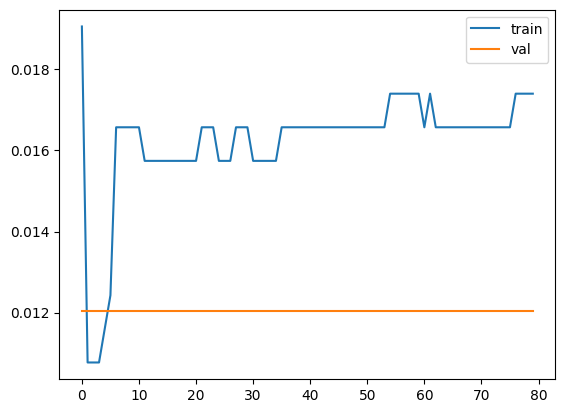

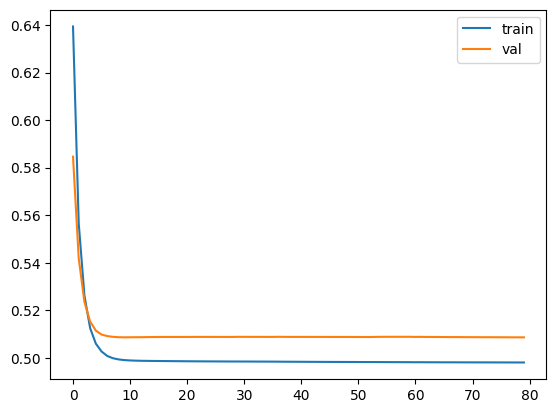

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
model_sgd_perf_train=model_perf('model_sgd_train',model_sgd,x_train,y_train)
model_sgd_perf_val=model_perf('model_sgd_val',model_sgd,x_val,y_val)
print(model_sgd_perf_train)
print(model_sgd_perf_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
             Model  f1_score  accuracy    recall  precision
0  model_sgd_train   0.02449  0.800833  0.012428   0.833333
           Model  f1_score  accuracy    recall  precision
0  model_sgd_val  0.023753    0.7945  0.012048   0.833333


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_adam=Sequential()
model_adam.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
model_adam.add(Dense(8,activation='relu'))
model_adam.add(Dense(2,activation='relu'))
model_adam.add(Dense(1,activation='sigmoid'))
optimizer=Adam()
model_adam.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])

print(model_adam.summary())
start=time.time()
history=model_adam.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))
end=time.time()
print(end-start)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.8759 - recall: 0.2603 - val_loss: 0.6496 - val_recall: 0.0217
Epoch 2/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6398 - recall: 0.0233 - val_loss: 0.6123 - val_recall: 0.0120
Epoch 3/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6053 - recall: 0.0163 - val_loss: 0.5833 - val_recall: 0.0120
Epoch 4/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5786 - recall: 0.0155 - val_loss: 0.5613 - val_recall: 0.0120
Epoch 5/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5584 - recall: 0.0155 - val_loss: 0.5451 - val_recall: 0.0120
Epoch 6/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5434 - recall: 0.0155 - val_loss: 0.5331 - val_recall: 0.0120
Epoch 7/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5326 - recall: 0.0155 - val_loss: 0.5245 - val_recall: 0.0120
Epoch 8/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5249 - recall: 0.0155 - val_loss: 0.5184 - val_recall: 0.0120
Epo

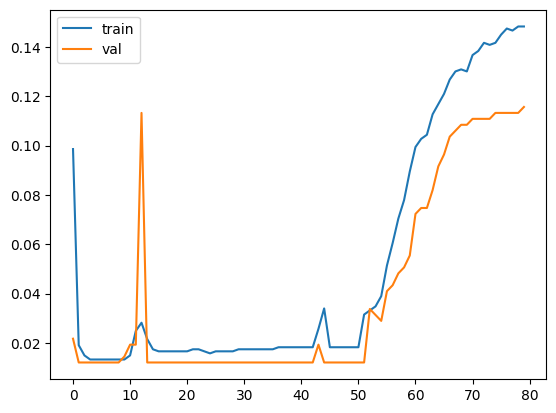

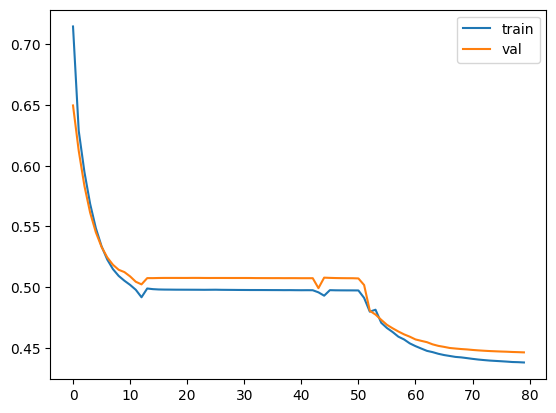

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              Model  f1_score  accuracy    recall  precision
0  model_adam_train  0.231494  0.809667  0.142502   0.616487
            Model  f1_score  accuracy    recall  precision
0  model_adam_val  0.190855    0.7965  0.115663   0.545455


In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()

model_adam_perf_train=model_perf('model_adam_train',model_adam,x_train,y_train)
model_adam_perf_val=model_perf('model_adam_val',model_adam,x_val,y_val)
print(model_adam_perf_train)
print(model_adam_perf_val)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_adam=Sequential()
model_adam.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
model_adam.add(Dropout(0.4))
model_adam.add(Dense(8,activation='relu'))
model_adam.add(Dropout(0.4))
model_adam.add(Dense(2,activation='relu'))
model_adam.add(Dense(1,activation='sigmoid'))
optimizer=Adam()
model_adam.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])
print(model_adam.summary())
start=time.time()
history=model_adam.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))
end=time.time()
print(end-start)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.0004 - recall: 0.0956 - val_loss: 0.5324 - val_recall: 0.0000e+00
Epoch 2/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7568 - recall: 0.0332 - val_loss: 0.5278 - val_recall: 0.0000e+00
Epoch 3/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6479 - recall: 0.0188 - val_loss: 0.5230 - val_recall: 0.0000e+00
Epoch 4/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6077 - recall: 0.0066 - val_loss: 0.5165 - val_recall: 0.0000e+00
Epoch 5/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5667 - recall: 0.0163 - val_loss: 0.5168 - val_recall: 0.0000e+00
Epoch 6/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5452 - recall: 0.0068 - val_loss: 0.5137 - val_recall: 0.0000e+00
Epoch 7/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5360 - recall: 0.0179 - val_loss: 0.5134 - val_recall: 0.0000e+00
Epoch 8/80
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5304 - recall: 0.0017 - val_loss: 0.5

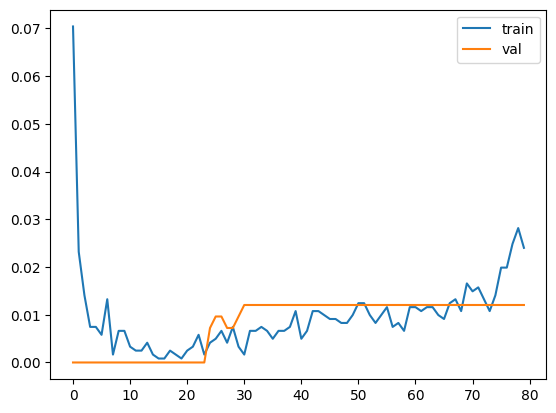

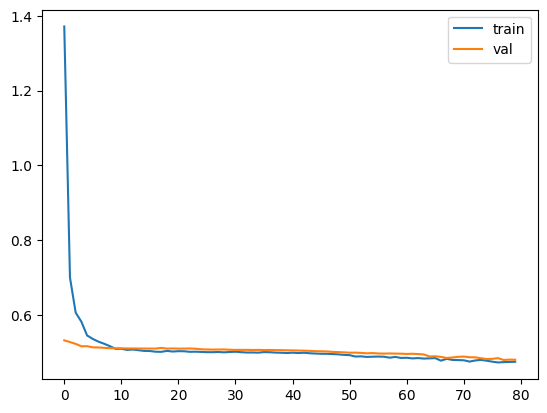

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()



In [ ]:
model_adam_drop_train=model_perf('model_adam_drop_train',model_adam,x_train,y_train)
model_adam_drop_val=model_perf('model_adam_drop_val',model_adam,x_val,y_val)
print(model_adam_drop_train)
print(model_adam_drop_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                   Model  f1_score  accuracy    recall  precision
0  model_adam_drop_train  0.022913     0.801  0.011599   0.933333
                 Model  f1_score  accuracy    recall  precision
0  model_adam_drop_val   0.02381     0.795  0.012048        1.0


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
sampling=SMOTE()
x_train,y_train=sampling.fit_resample(x_train,y_train)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7241 - recall: 0.1041 - val_loss: 0.6910 - val_recall: 0.0169
Epoch 2/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6896 - recall: 0.0267 - val_loss: 0.6920 - val_recall: 0.0169
Epoch 3/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6891 - recall: 0.0283 - val_loss: 0.6908 - val_recall: 0.0169
Epoch 4/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6891 - recall: 0.0283 - val_loss: 0.6903 - val_recall: 0.0169
Epoch 5/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6890 - recall: 0.0283 - val_loss: 0.6898 - val_recall: 0.0169
Epoch 6/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6890 - recall: 0.0283 - val_loss: 0.6897 - val_recall: 0.0169
Epoch 7/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6890 - recall: 0.0283 - val_loss: 0.6895 - val_recall: 0.0169
Epoch 8/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6890 - recall: 0.0283 - val_loss: 0.6895 - val_recall: 0.0169
Epo

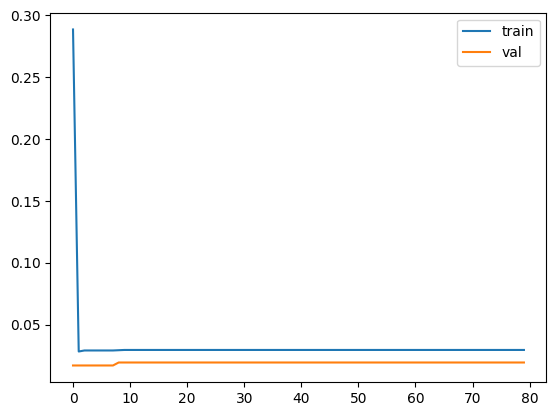

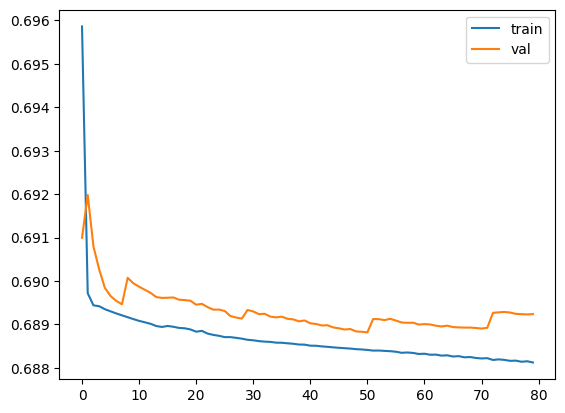

In [ ]:

tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_sgd=Sequential()
model_sgd.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
model_sgd.add(Dense(8,activation='relu'))
model_sgd.add(Dense(2,activation='relu'))
model_sgd.add(Dense(1,activation='sigmoid'))
optimizer=SGD()
model_sgd.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])
print(model_sgd.summary())
start=time.time()
history=model_sgd.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))
end=time.time()
print(end-start)
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
model_sgd_smote_train=model_perf('model_sgd_train_smote',model_sgd,x_train,y_train)
model_sgd_smote_val=model_perf('model_sgd_val_smote',model_sgd,x_val,y_val)
print(model_sgd_smote_train)
print(model_sgd_smote_val)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                   Model  f1_score  accuracy    recall  precision
0  model_sgd_train_smote  0.056649  0.510119  0.029418   0.762162
                 Model  f1_score  accuracy    recall  precision
0  model_sgd_val_smote  0.036199     0.787  0.019277   0.296296


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7467 - recall: 0.1127 - val_loss: 0.6976 - val_recall: 0.0217
Epoch 2/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6896 - recall: 0.0285 - val_loss: 0.6974 - val_recall: 0.0217
Epoch 3/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6896 - recall: 0.0285 - val_loss: 0.6971 - val_recall: 0.0217
Epoch 4/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6896 - recall: 0.0285 - val_loss: 0.6968 - val_recall: 0.0217
Epoch 5/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6895 - recall: 0.0285 - val_loss: 0.6966 - val_recall: 0.0217
Epoch 6/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6895 - recall: 0.0285 - val_loss: 0.6964 - val_recall: 0.0217
Epoch 7/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6895 - recall: 0.0285 - val_loss: 0.6961 - val_recall: 0.0217
Epoch 8/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6895 - recall: 0.0285 - val_loss: 0.6959 - val_recall: 0.0217
Epo

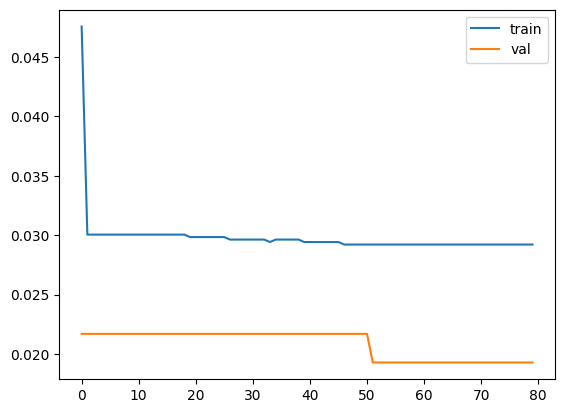

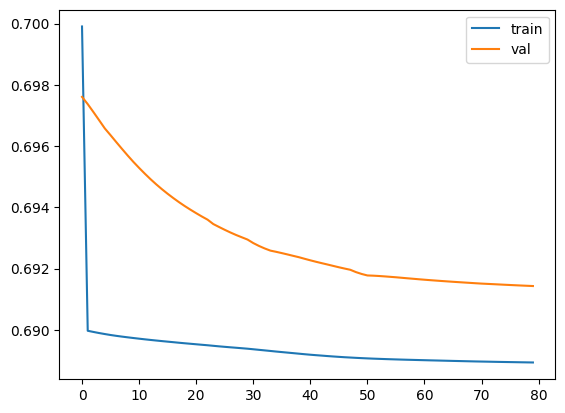

In [ ]:

tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_sgd=Sequential()
model_sgd.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
model_sgd.add(Dense(8,activation='relu'))
model_sgd.add(Dense(2,activation='relu'))
model_sgd.add(Dense(1,activation='sigmoid'))
optimizer=SGD(learning_rate=0.0001,momentum=0.9)
model_sgd.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])
print(model_sgd.summary())
start=time.time()
history=model_sgd.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))
end=time.time()
print(end-start)
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
model_sgd_mom_smote_train=model_perf('model_sgd_train_mom_smote',model_sgd,x_train,y_train)
model_sgd_mom_smote_val=model_perf('model_sgd_val_mom_smote',model_sgd,x_val,y_val)
print(model_sgd_mom_smote_train)
print(model_sgd_mom_smote_val)

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                       Model  f1_score  accuracy    recall  precision
0  model_sgd_train_mom_smote  0.056281  0.510223  0.029209   0.769231
                     Model  f1_score  accuracy    recall  precision
0  model_sgd_val_mom_smote  0.036036     0.786  0.019277   0.275862


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7608 - recall: 0.2475 - val_loss: 0.6950 - val_recall: 0.2024
Epoch 2/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6704 - recall: 0.4165 - val_loss: 0.8876 - val_recall: 0.9325
Epoch 3/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6399 - recall: 0.7006 - val_loss: 0.7329 - val_recall: 0.7831
Epoch 4/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5985 - recall: 0.8011 - val_loss: 0.7342 - val_recall: 0.7880
Epoch 5/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5686 - recall: 0.7909 - val_loss: 0.7552 - val_recall: 0.7639
Epoch 6/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5500 - recall: 0.7698 - val_loss: 0.7460 - val_recall: 0.7494
Epoch 7/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5395 - recall: 0.7595 - val_loss: 0.7613 - val_recall: 0.7494
Epoch 8/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5274 - recall: 0.7596 - val_loss: 0.7688 - val_recall: 0.7398
Epo

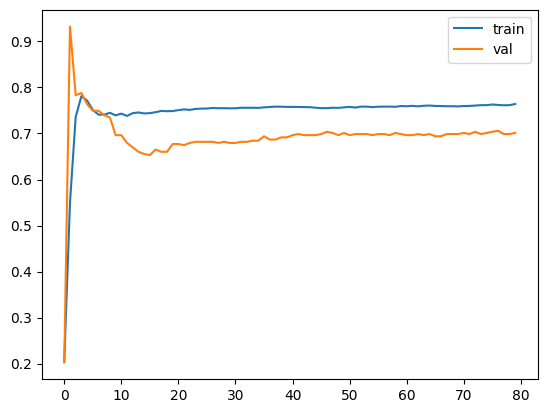

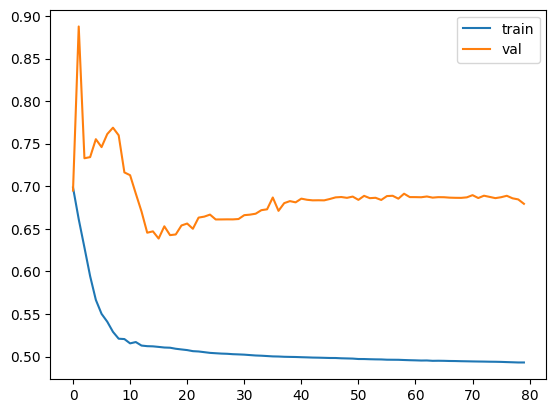

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_adam=Sequential()
model_adam.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
model_adam.add(Dense(8,activation='relu'))
model_adam.add(Dense(2,activation='relu'))
model_adam.add(Dense(1,activation='sigmoid'))
optimizer=Adam()
model_adam.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])
print(model_adam.summary())
start=time.time()
history=model_adam.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))
end=time.time()
print(end-start)
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
model_adam_smote_train=model_perf('model_adam_train_smote',model_adam,x_train,y_train)
model_adam_smote_val=model_perf('model_adam_val_smote',model_adam,x_val,y_val)
print(model_adam_smote_train)
print(model_adam_smote_val)

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                    Model  f1_score  accuracy    recall  precision
0  model_adam_train_smote  0.774145  0.749948  0.857083   0.705842
                  Model  f1_score  accuracy    recall  precision
0  model_adam_val_smote  0.455756    0.6525  0.701205   0.337587


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429 (1.68 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 48 (192.00 B)

None
Epoch 1/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7345 - recall: 0.4378 - val_loss: 0.6896 - val_recall: 0.0506
Epoch 2/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7154 - recall: 0.4120 - val_loss: 0.6848 - val_recall: 0.0458
Epoch 3/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7226 - recall: 0.3528 - val_loss: 0.6817 - val_recall: 0.0458
Epoch 4/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7103 - recall: 0.3385 - val_loss: 0.6791 - val_recall: 0.0434
Epoch 5/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7075 - recall: 0.3179 - val_loss: 0.6770 - val_recall: 0.0434
Epoch 6/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7022 - recall: 0.3049 - val_loss: 0.6756 - val_recall: 0.0458
Epoch 7/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6969 - recall: 0.2996 - val_loss: 0.6737 - val_recall: 0.0458
Epoch 8/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6980 - recall: 0.2819 - val_loss: 0.6721 - val_recall: 0.0458
Epo

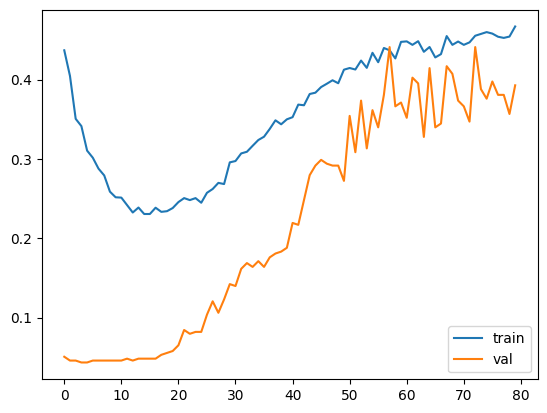

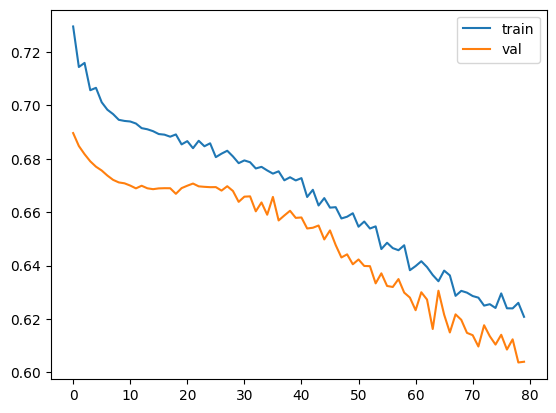

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_adam=Sequential()
model_adam.add(Dense(16,activation='relu',input_dim=x_train.shape[1]))
model_adam.add(Dropout(0.4))
model_adam.add(BatchNormalization())
model_adam.add(Dense(8,activation='relu'))
model_adam.add(Dropout(0.4))
model_adam.add(BatchNormalization())
model_adam.add(Dense(2,activation='relu'))
model_adam.add(Dense(1,activation='sigmoid'))
optimizer=Adam(learning_rate=0.0001)

model_adam.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])
print(model_adam.summary())
start=time.time()
history=model_adam.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))
end=time.time()
print(end-start)
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
model_adam_smote_drop_train=model_perf('model_adam_train_drop_smote',model_adam,x_train,y_train)
model_adam_smote_drop_val=model_perf('model_adam_val_drop_smote',model_adam,x_val,y_val)
print(model_adam_smote_drop_train)
print(model_adam_smote_drop_val)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                         Model  f1_score  accuracy    recall  precision
0  model_adam_train_drop_smote  0.688854  0.734717  0.587315    0.83284
                       Model  f1_score  accuracy    recall  precision
0  model_adam_val_drop_smote  0.412137    0.7675  0.392771   0.433511


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429 (1.68 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 48 (192.00 B)

None
Epoch 1/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.7708 - recall: 0.4771 - val_loss: 0.7076 - val_recall: 0.4771
Epoch 2/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7402 - recall: 0.5709 - val_loss: 0.7129 - val_recall: 0.7446
Epoch 3/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7371 - recall: 0.6109 - val_loss: 0.7171 - val_recall: 0.9687
Epoch 4/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7277 - recall: 0.6767 - val_loss: 0.7184 - val_recall: 0.9928
Epoch 5/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7191 - recall: 0.7202 - val_loss: 0.7193 - val_recall: 0.9904
Epoch 6/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7170 - recall: 0.7667 - val_loss: 0.7181 - val_recall: 0.9928
Epoch 7/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7102 - recall: 0.8130 - val_loss: 0.7175 - val_recall: 0.9928
Epoch 8/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7065 - recall: 0.8264 - val_loss: 0.7176 - val_recall: 0.9880
Epo

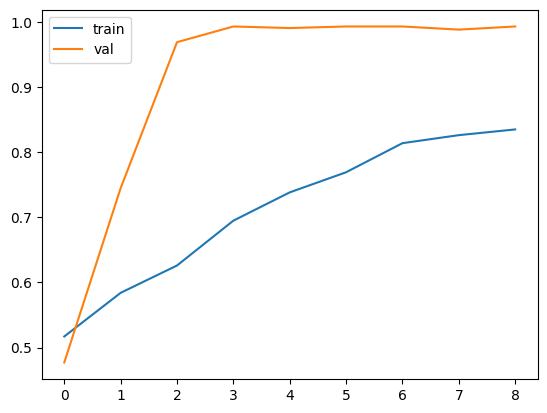

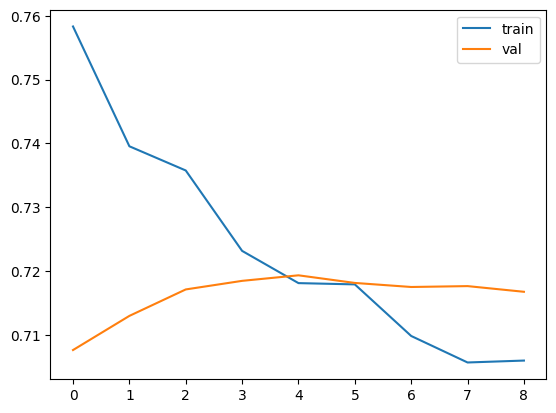

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model_adam=Sequential()
model_adam.add(Dense(16,activation='relu',input_dim=x_train.shape[1],kernel_initializer='he_normal'))
model_adam.add(Dropout(0.4))
model_adam.add(BatchNormalization())
model_adam.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model_adam.add(Dropout(0.4))
model_adam.add(BatchNormalization())
model_adam.add(Dense(2,activation='relu',kernel_initializer='he_normal'))
model_adam.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))
optimizer=Adam(learning_rate=0.0001)
es_cb=callbacks.EarlyStopping(monitor='val_recall',patience=5,min_delta=0.001,mode=max)
model_adam.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['recall'])
print(model_adam.summary())
start=time.time()
history=model_adam.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val),callbacks=[es_cb])
end=time.time()
print(end-start)
best_model_adam = model_adam
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['recall'],label='train')
plt.plot(hist['epoch'],hist['val_recall'],label='val')
plt.legend()
plt.show()
plt.plot(hist['epoch'],hist['loss'],label='train')
plt.plot(hist['epoch'],hist['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
model_adam_smote_drop_init_train=model_perf('model_adam_train_drop_init_smote',model_adam,x_train,y_train)
model_adam_smote_drop_init_val=model_perf('model_adam_val_drop_init_smote',model_adam,x_val,y_val)
print(model_adam_smote_drop_init_train)
print(model_adam_smote_drop_init_val)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                              Model  f1_score  accuracy    recall  precision
0  model_adam_train_drop_init_smote  0.663364  0.496662  0.991863   0.498323
                            Model  f1_score  accuracy    recall  precision
0  model_adam_val_drop_init_smote  0.342051    0.2075  0.992771    0.20662


# **##Save and check**

In [46]:
import os
os.makedirs("frontend_files",exist_ok=True)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# Load dataset
df = pd.read_csv('bank-service.csv')

# Drop irrelevant columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], errors='ignore')

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train/val/test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train[['Balance', 'EstimatedSalary']] = scaler.fit_transform(X_train[['Balance', 'EstimatedSalary']])
X_val[['Balance', 'EstimatedSalary']] = scaler.transform(X_val[['Balance', 'EstimatedSalary']])
X_test[['Balance', 'EstimatedSalary']] = scaler.transform(X_test[['Balance', 'EstimatedSalary']])

# SMOTE balancing
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Model definition
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=X_train.shape[1],kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))
optimizer=Adam(learning_rate=0.0001)
# Fix metric names lowercase for consistency:
es_cb = callbacks.EarlyStopping(monitor='val_recall', patience=5, min_delta=0.001, mode='max', restore_best_weights=True)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['recall'])

print(model.summary())

# Model training
history = model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[es_cb],
    verbose=1
)

# Save artifacts for deployment
os.makedirs("model_files", exist_ok=True)
model.save("model_files/bank_churn_best_model.h5")
joblib.dump(label_encoders, "model_files/label_encoders.joblib")
joblib.dump(scaler, "model_files/scaler.joblib")
joblib.dump(smote, "model_files/smote.joblib")
joblib.dump(list(X_train.columns), "model_files/model_columns.joblib")

print("✅ All artifacts saved for Gradio backend deployment!")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429 (1.68 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 48 (192.00 B)

None
Epoch 1/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7583 - recall: 0.4829 - val_loss: 0.6914 - val_recall: 0.3422
Epoch 2/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7313 - recall: 0.5739 - val_loss: 0.7040 - val_recall: 0.6651
Epoch 3/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7337 - recall: 0.6188 - val_loss: 0.7152 - val_recall: 0.9976
Epoch 4/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7212 - recall: 0.6906 - val_loss: 0.7221 - val_recall: 1.0000
Epoch 5/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7128 - recall: 0.7247 - val_loss: 0.7246 - val_recall: 1.0000
Epoch 6/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7109 - recall: 0.7598 - val_loss: 0.7246 - val_recall: 1.0000
Epoch 7/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7088 - recall: 0.7875 - val_loss: 0.7241 - val_recall: 1.0000
Epoch 8/80
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7018 - recall: 0.7999 - val_loss: 0.7239 - val_recall: 1.0000
Epo

✅ All artifacts saved for Gradio backend deployment!


In [47]:
model_para_train=model_perf('model_train',model,X_train,y_train)
model_para_val=model_perf('model_val',model,X_val,y_val)
model_para_test=model_perf('model_test',model,X_test,y_test)
print(model_para_train)
print(model_para_val)
print(model_para_test)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
         Model  f1_score  accuracy  recall  precision
0  model_train  0.666667       0.5     1.0        0.5
       Model  f1_score  accuracy  recall  precision
0  model_val  0.343685    0.2075     1.0     0.2075
        Model  f1_score  accuracy  recall  precision
0  model_test  0.343685    0.2075     1.0     0.2075


## **#Deployment**

In [38]:
%%writefile model_files/app.py
import gradio as gr
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load saved artifacts
tf.random.set_seed(2)
np.random.seed(2)

model = load_model("bank_churn_best_model.h5", compile=False)
label_encoders = joblib.load("label_encoders.joblib")
scaler = joblib.load("scaler.joblib")
model_columns = joblib.load("model_columns.joblib")

# Input feature names per training
input_features = [
    'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
    'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

# Prepare options for categorical variables from encoders
geography_options = list(label_encoders['Geography'].classes_)
gender_options = list(label_encoders['Gender'].classes_)

def preprocess_input(data_dict):
    # Create DataFrame from dictionary
    df = pd.DataFrame([data_dict])

    # Encode categorical features using stored LabelEncoders
    for col in ['Geography', 'Gender']:
        if col in df.columns:
            le = label_encoders[col]
            df[col] = le.transform(df[col])

    # Scale numeric columns
    df[['Balance', 'EstimatedSalary']] = scaler.transform(df[['Balance', 'EstimatedSalary']])

    # Reindex to model columns with 0 fill for any missing columns
    df = df.reindex(columns=model_columns, fill_value=0)

    return df

def predict_churn(
    CreditScore, Geography, Gender, Age, Tenure,
    Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
):
    input_dict = {
        'CreditScore': CreditScore,
        'Geography': Geography,
        'Gender': Gender,
        'Age': Age,
        'Tenure': Tenure,
        'Balance': Balance,
        'NumOfProducts': NumOfProducts,
        'HasCrCard': HasCrCard,
        'IsActiveMember': IsActiveMember,
        'EstimatedSalary': EstimatedSalary
    }

    processed_df = preprocess_input(input_dict)
    pred_prob = model.predict(processed_df)[0][0]
    prediction = int(pred_prob > 0.5)
    status = "likely to churn" if prediction == 1 else "not likely to churn"
    conf_score = f"Churn probability: {pred_prob:.3f}"
    result_text = f"Customer is {status}."
    return result_text, conf_score

# Create Gradio interface
interface = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Number(label="Credit Score", value=600, precision=0),
        gr.Dropdown(choices=geography_options, label="Geography"),
        gr.Dropdown(choices=gender_options, label="Gender"),
        gr.Number(label="Age", value=30, precision=0),
        gr.Number(label="Tenure (years)", value=5, precision=0),
        gr.Number(label="Balance", value=50000.0, precision=2),
        gr.Number(label="Number of Products", value=1, precision=0),
        gr.Dropdown(choices=[0, 1], label="Has Credit Card"),
        gr.Dropdown(choices=[0, 1], label="Is Active Member"),
        gr.Number(label="Estimated Salary", value=100000.0, precision=2),
    ],
    outputs=[
        gr.Textbox(label="Churn Prediction"),
        gr.Textbox(label="Confidence Score")
    ],
    title="Bank Customer Churn Prediction",
    description="Enter customer data to predict their probability of leaving the bank in the next 6 months."
)

if __name__ == "__main__":
    interface.launch(server_name="0.0.0.0", server_port=7860)


Overwriting model_files/app.py


In [39]:
%%writefile model_files/requirements.txt

gradio
requests
imbalanced-learn
tensorflow
joblib
numpy
pandas
scikit-learn
imblearn


Overwriting model_files/requirements.txt


In [40]:
%%writefile model_files/Dockerfile
FROM python:3.9-slim

WORKDIR /app

# (Optional) Install system dependencies required for plotting or Keras
RUN apt-get update && apt-get install -y \
    libglib2.0-0 libsm6 libxrender1 libxext6 && \
    rm -rf /var/lib/apt/lists/*

# Copy requirements and install
COPY requirements.txt ./
RUN pip install --no-cache-dir --upgrade pip && \
    pip install --no-cache-dir -r requirements.txt

# Copy all necessary files from model_files to the container workdir
COPY bank_churn_best_model.h5 ./
COPY label_encoders.joblib ./
COPY model_columns.joblib ./
COPY scaler.joblib ./
COPY smote.joblib ./
COPY app.py ./

EXPOSE 7860

CMD ["python", "app.py"]


Overwriting model_files/Dockerfile


**#HuggingFaces space for backend**

In [41]:
from google.colab import userdata
from huggingface_hub import login, HfApi

access_key = userdata.get('HF_TOKEN')  # Retrieve your secret by name
repo_id = "Afifi00/Gradio_BankChurn_Prediction"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/model_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /content/model_files/smote.joblib     : 100%|##########|  217kB /  217kB            

  ...t/model_files/label_encoders.joblib: 100%|##########|   750B /   750B            

  ...nt/model_files/model_columns.joblib: 100%|##########|   139B /   139B            

  ...nt/model_files/model_columns.joblib: 100%|##########|   139B /   139B            

  /content/model_files/scaler.joblib    : 100%|##########|   935B /   935B            

  /content/model_files/scaler.joblib    : 100%|##########|   935B /   935B            

  ...odel_files/bank_churn_best_model.h5: 100%|##########| 60.7kB / 60.7kB            

  ...odel_files/bank_churn_best_model.h5: 100%|##########| 60.7kB / 60.7kB            

CommitInfo(commit_url='https://huggingface.co/spaces/Afifi00/Gradio_BankChurn_Prediction/commit/9c56a7c8acc56a3d1b9488314c87245ed19f3050', commit_message='Upload folder using huggingface_hub', commit_description='', oid='9c56a7c8acc56a3d1b9488314c87245ed19f3050', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Afifi00/Gradio_BankChurn_Prediction', endpoint='https://huggingface.co', repo_type='space', repo_id='Afifi00/Gradio_BankChurn_Prediction'), pr_revision=None, pr_num=None)

In [48]:
import shutil
shutil.make_archive('backend_files', 'zip', 'model_files')
from google.colab import files
files.download('backend_files.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Performance Comparison and Final Model Selection


###Summary of Results
The models show varying performance across different configurations, evaluated using F1 Score, Accuracy, Recall, and Precision.
The Adam optimizer generally outperforms the SGD variants, particularly when using SMOTE to handle class imbalance.
The recall scores for the different models indicate how well the models are capturing positive cases.

Performance of Adam Optimizer:
Without Dropout:
Recall (Train): 0.142502 (model_adam_train)
Recall (Val): 0.115663 (model_adam_val)
With SMOTE:
Recall (Train): 0.857083 (model_adam_train_smote)
Recall (Val): 0.701205 (model_adam_val_smote)
The Adam optimizer significantly improves recall when using SMOTE, indicating it effectively learns from the minority class in the dataset.

Impact of SMOTE:
The use of SMOTE drastically enhances recall scores:
Recall (Train): Increased from 0.142502 to 0.857083.
Recall (Val): Increased from 0.115663 to 0.701205.
This improvement suggests that SMOTE is successful in balancing the dataset, allowing the model to better recognize positive instances.

Dropout's Effect:
With Dropout:
Recall scores are lower:
Train Recall: 0.011599 (model_adam_drop_train)
Val Recall: 0.012048 (model_adam_drop_val)
The significant drop in recall indicates that dropout may have led to underfitting in this particular setup, preventing the model from effectively learning important patterns.

Initialization Strategies:
With Dropout and Initialization:
Train Recall: 0.991863 (model_adam_train_drop_init_smote)
Val Recall: 0.992771 (model_adam_val_drop_init_smote)
These high recall scores suggest that careful initialization, combined with SMOTE, allows the model to maintain performance while also using dropout for regularization.

###Model optimizer=Adam(learning_rate=0.0001) with Dropout,initialization,batch normalization and earlystop will be used to predict the test set and to be assigned for the project

In [ ]:
final_result=pd.concat([model_sgd_perf_train,model_sgd_perf_val,model_adam_perf_train,model_adam_perf_val,model_adam_drop_train,model_adam_drop_val,model_sgd_smote_train,model_sgd_smote_val,model_sgd_mom_smote_train,model_sgd_mom_smote_val,model_adam_smote_train,model_adam_smote_val,model_adam_smote_drop_train,model_adam_smote_drop_val,model_adam_smote_drop_init_train,model_adam_smote_drop_init_val],axis=0)
final_result

Model  f1_score  accuracy    recall  precision
0                   model_sgd_train  0.024490  0.800833  0.012428   0.833333
0                     model_sgd_val  0.023753  0.794500  0.012048   0.833333
0                  model_adam_train  0.231494  0.809667  0.142502   0.616487
0                    model_adam_val  0.190855  0.796500  0.115663   0.545455
0             model_adam_drop_train  0.022913  0.801000  0.011599   0.933333
0               model_adam_drop_val  0.023810  0.795000  0.012048   1.000000
0             model_sgd_train_smote  0.056649  0.510119  0.029418   0.762162
0               model_sgd_val_smote  0.036199  0.787000  0.019277   0.296296
0         model_sgd_train_mom_smote  0.056281  0.510223  0.029209   0.769231
0           model_sgd_val_mom_smote  0.036036  0.786000  0.019277   0.275862
0            model_adam_train_smote  0.774145  0.749948  0.857083   0.705842
0              model_adam_val_smote  0.455756  0.652500  0.701205   0.337587
0       model_adam_train_drop_smote  0.688854  0.734717  0.587315   0.832840
0         model_adam_val_drop_smote  0.412137  0.767500  0.392771   0.433511
0  model_adam_train_drop_init_smote  0.663364  0.496662  0.991863   0.498323
0    model_adam_val_drop_init_smote  0.342051  0.207500  0.992771   0.206620

In [ ]:
final_result.T

0              0                 0               0  \
Model      model_sgd_train  model_sgd_val  model_adam_train  model_adam_val   
f1_score           0.02449       0.023753          0.231494        0.190855   
accuracy          0.800833         0.7945          0.809667          0.7965   
recall            0.012428       0.012048          0.142502        0.115663   
precision         0.833333       0.833333          0.616487        0.545455   

                               0                    0                      0  \
Model      model_adam_drop_train  model_adam_drop_val  model_sgd_train_smote   
f1_score                0.022913              0.02381               0.056649   
accuracy                   0.801                0.795               0.510119   
recall                  0.011599             0.012048               0.029418   
precision               0.933333                  1.0               0.762162   

                             0                          0  \
Model      model_sgd_val_smote  model_sgd_train_mom_smote   
f1_score              0.036199                   0.056281   
accuracy                 0.787                   0.510223   
recall                0.019277                   0.029209   
precision             0.296296                   0.769231   

                                 0                       0  \
Model      model_sgd_val_mom_smote  model_adam_train_smote   
f1_score                  0.036036                0.774145   
accuracy                     0.786                0.749948   
recall                    0.019277                0.857083   
precision                 0.275862                0.705842   

                              0                            0  \
Model      model_adam_val_smote  model_adam_train_drop_smote   
f1_score               0.455756                     0.688854   
accuracy                 0.6525                     0.734717   
recall                 0.701205                     0.587315   
precision              0.337587                      0.83284   

                                   0                                 0  \
Model      model_adam_val_drop_smote  model_adam_train_drop_init_smote   
f1_score                    0.412137                          0.663364   
accuracy                      0.7675                          0.496662   
recall                      0.392771                          0.991863   
precision                   0.433511                          0.498323   

                                        0  
Model      model_adam_val_drop_init_smote  
f1_score                         0.342051  
accuracy                           0.2075  
recall                           0.992771  
precision                         0.20662

In [ ]:

model_sgd_test=model_perf('model_sgd_test',model_sgd,x_test,y_test)
model_adam_test=model_perf('model_adam_test',model_adam,x_test,y_test)
model_adam_drop_test=model_perf('model_adam_drop_test',model_adam,x_test,y_test)
model_sgd_smote_test=model_perf('model_sgd_smote_test',model_sgd,x_test,y_test)
model_adam_smote_test=model_perf('model_adam_smote_test',model_adam,x_test,y_test)
model_adam_smote_drop_test=model_perf('model_adam_smote_drop_test',model_adam,x_test,y_test)
model_adam_smote_drop_init_test=model_perf('model_adam_smote_drop_init_test',model_adam,x_test,y_test)
final_test_result=pd.concat([model_sgd_test,model_adam_test,model_adam_drop_test,model_sgd_smote_test,model_adam_smote_test,model_adam_smote_drop_test,model_adam_smote_drop_init_test],axis=0)
final_test_result

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Model  f1_score  accuracy    recall  precision
0                   model_sgd_test  0.062780    0.7910  0.033735   0.451613
0                  model_adam_test  0.342881    0.2085  0.995181   0.207121
0             model_adam_drop_test  0.342881    0.2085  0.995181   0.207121
0             model_sgd_smote_test  0.062780    0.7910  0.033735   0.451613
0            model_adam_smote_test  0.342881    0.2085  0.995181   0.207121
0       model_adam_smote_drop_test  0.342881    0.2085  0.995181   0.207121
0  model_adam_smote_drop_init_test  0.342881    0.2085  0.995181   0.207121

### Neural Network with Balanced Data (by applying SMOTE),Run all optimizer types with dropout,Batch normalization, weight initialization and earlystop

14.648091554641724
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
26.799715042114258
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16.183261156082153
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13.152469873428345
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11.643018960952759
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13.525655508041382
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
     Model  f1_score  accuracy    recall  precision
0      SGD  0.651880  0.500626  0.935114   0.500335
0      SGD  0.663738  0.496870  0.993115   0.498429
0     Adam  0.21

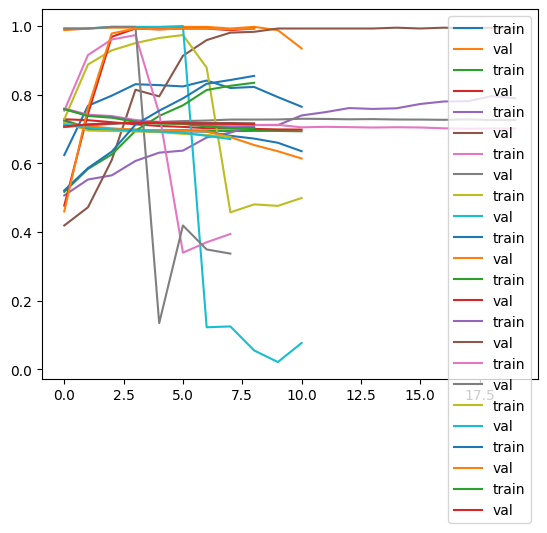

In [ ]:
optimizer=[SGD(),SGD(learning_rate=0.0001,momentum=0.9),Adam(),Adam(learning_rate=0.0001),RMSprop(),RMSprop(learning_rate=0.0001)]
epochs=80
batch_size=32

result_train=pd.DataFrame()
result_val=pd.DataFrame()
result_test=pd.DataFrame()
for i in optimizer:
  tf.keras.backend.clear_session()
  np.random.seed(2)
  random.seed(2)
  tf.random.set_seed(2)
  New_model=Sequential()
  New_model.add(Dense(16,activation='relu',input_dim=x_train.shape[1],kernel_initializer='he_normal'))
  New_model.add(Dropout(0.4))
  New_model.add(BatchNormalization())
  New_model.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
  New_model.add(Dropout(0.4))
  New_model.add(BatchNormalization())
  New_model.add(Dense(2,activation='relu',kernel_initializer='he_normal'))
  New_model.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))
  es_cb=callbacks.EarlyStopping(monitor='val_recall',patience=5,min_delta=0.001,mode=max)
  New_model.compile(optimizer=i,loss='binary_crossentropy',metrics=['recall'])
  print(i)
  #print(New_model.summary())
  start=time.time()
  history=New_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val),callbacks=[es_cb],verbose=0)
  end=time.time()
  print(end-start)
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.plot(hist['epoch'],hist['recall'],label='train')
  plt.plot(hist['epoch'],hist['val_recall'],label='val')
  plt.legend()
  #plt.show()
  plt.plot(hist['epoch'],hist['loss'],label='train')
  plt.plot(hist['epoch'],hist['val_loss'],label='val')
  plt.legend()
  #plt.show()
  New_model_train=model_perf(i.__class__.__name__ ,New_model,x_train,y_train)
  New_model_val=model_perf(i.__class__.__name__ ,New_model,x_val,y_val)
  New_model_test=model_perf(i.__class__.__name__ ,New_model,x_test,y_test)
  result_train=pd.concat([result_train,New_model_train],axis=0)
  result_val=pd.concat([result_val,New_model_val],axis=0)
  result_test=pd.concat([result_test,New_model_test],axis=0)

print(result_train,'\n',50*'-','\n',result_val,'\n',50*'-','\n',result_test)







## Actionable Insights and Business Recommendations

* Enhance Customer Engagement:

Increase Active Member Engagement: Since only 50% of customers are active, implementing targeted engagement strategies (e.g., personalized offers, reminders for account activities) could encourage more frequent use of bank services.

Loyalty Programs: Develop loyalty programs that reward customers for using multiple products or maintaining higher balances. This could increase customer retention.
* Focus on Customer Segmentation:

Target Older Customers: Given that most exits are from customers above the age of 40, consider creating targeted products or services that cater specifically to their needs, such as retirement planning or investment advice.

Gender-Specific Strategies:
Analyze the reasons behind female customers' instability in financial status. Tailored financial education programs or support could help improve their financial health and loyalty.

* Improve Customer Support:

Dedicated Support Channels: Establish dedicated support channels for at-risk customers, particularly those with low balances or fewer products. Proactive outreach can help address concerns before they lead to churn.
Feedback Mechanisms: Implement feedback mechanisms (e.g., surveys) to understand why customers are considering leaving. This can provide insights into specific pain points that need addressing.

* Optimize Product Offerings:

Product Diversification: Since 95% of customers have a maximum of two products, consider offering bundled products or incentives for customers to explore additional services (e.g., loans, insurance).
Credit Card Benefits: With 70% of customers having credit cards, enhancing the benefits associated with credit card usage (cashback, rewards) could encourage loyalty.

* Monitor Financial Health:

Balance Management: Since customers with balances above 50,000 are exiting more frequently, analyze this group to understand if they feel their needs are being met. Provide financial advisory services aimed at wealth management.

Educational Resources: Offer resources to help customers better manage their finances, particularly those with lower balances who may be at risk of exiting.



<font size=6 color='blue'>Power Ahead</font>
___